# Simple Linear Regression

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
slr_dataset = pd.read_csv('./Datasets/exp_1_A.csv') # simple linear regression dataset (called as dataframe when loaded in pandas)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # r2 score is a regression evaluation metric

In [82]:
X = slr_dataset.iloc[:,:-1].values # independent variable
y = slr_dataset.iloc[:,-1].values # dependent variable
# dataframe.iloc[row indices,column indices]
# : all rows
# :-1 staring from first except last column(-1)
# to get specific columns, dataframe.iloc[:,[0,1,2,3,6]] 

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [84]:
slr_model = LinearRegression()
slr_model.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred = slr_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.9816423482070253


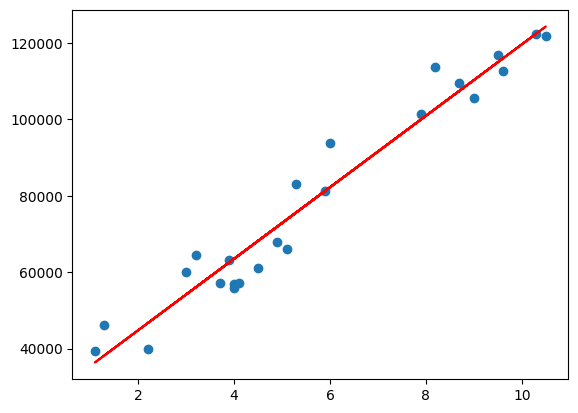

In [86]:
plt.scatter(X_train,y_train) # to plot points
X_train_pred = slr_model.predict(X_train)
plt.plot(X_train,X_train_pred,color='red') # to plot best fit line, 
plt.show()

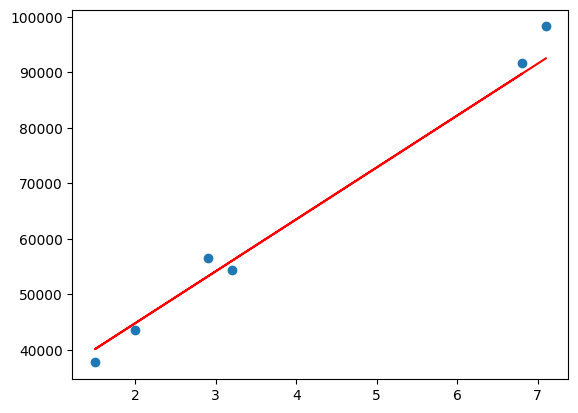

In [87]:
plt.scatter(X_test,y_test) # to plot points
X_test_pred = slr_model.predict(X_test)
plt.plot(X_test,X_test_pred,color='red') # to plot best fit line, 
plt.show()

# Multiple Linear Regression

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [89]:
mlr_dataset = pd.read_csv('./Datasets/exp_1_B.csv')

In [90]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
X = mlr_dataset.iloc[:,:-1]
y = mlr_dataset.iloc[:,-1]

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:,:3]) # scaling cols 0 to 2

In [93]:
ohe = OneHotEncoder(sparse_output=False,drop='first')
X_encoded = ohe.fit_transform(X.iloc[:,[3]]) # encoding categorical column [col number is 3]

In [94]:
X = np.hstack((X_scaled,X_encoded))

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [96]:
mlr_model = LinearRegression()
mlr_model.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = mlr_model.predict(X_test)
print('R2 Score: ',r2_score(y_test,y_pred))

R2 Score:  0.9901105113397772


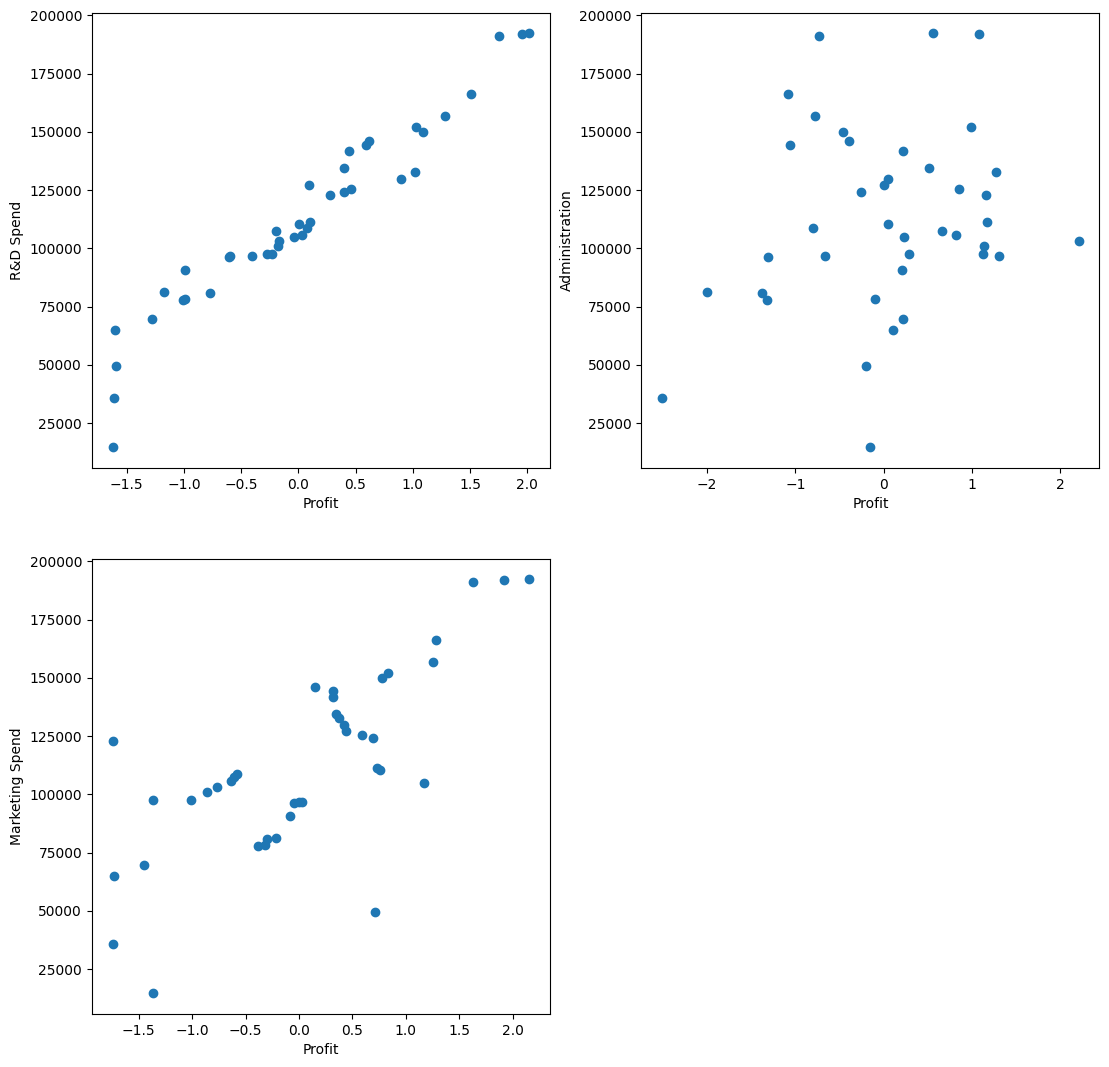

In [98]:
plt.figure(figsize=(13,13))
for i in range(3):
    df = pd.DataFrame(X_train)
    value = df.iloc[:,i]
    plt.subplot(2,2,i+1)
    plt.xlabel("Profit")
    plt.ylabel(mlr_dataset.columns[i])
    plt.scatter(value,y_train)  
plt.show()

# DBSCAN

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [100]:
dbscan_dataset = pd.read_csv('./Datasets/exp_5.csv')

In [101]:
scaler = StandardScaler()
data_transformed = scaler.fit_transform(dbscan_dataset.iloc[:,3:5].values)

In [102]:
dbscan_model = DBSCAN(eps=0.36,min_samples=3)
dbscan_model.fit(data_transformed)

DBSCAN(eps=0.36, min_samples=3)

In [103]:
labels = dbscan_model.labels_
clusters = len(set(labels))
print("Clusters: ",clusters)

Clusters:  8


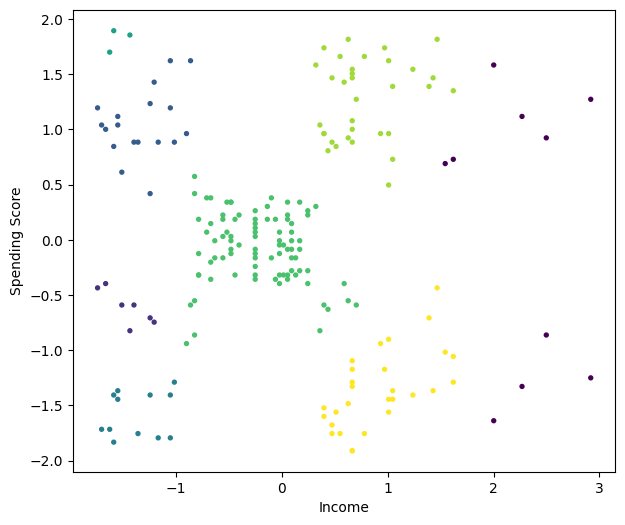

In [104]:
plt.figure(figsize=(7,6))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.scatter(x=data_transformed[:,0],y=data_transformed[:,1],c=labels,s=8,) # c = color,s = size
plt.show()

In [105]:
print(silhouette_score(data_transformed,labels)) # higher is better

0.4810028729849619


# Random Forest

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
rf_dataset = pd.read_csv('./Datasets/exp_3.csv')

In [108]:
x = rf_dataset.iloc[:,1:-1].values
y = rf_dataset.iloc[:,-1].values

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

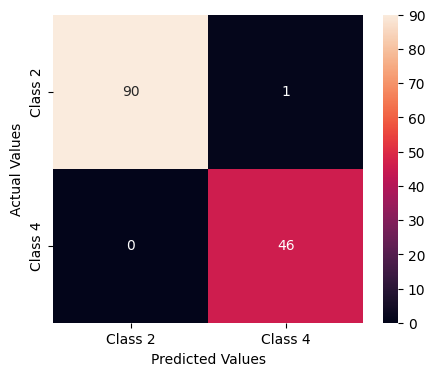

In [111]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,xticklabels=['Class 2','Class 4'],yticklabels=['Class 2','Class 4'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [112]:

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           2       1.00      0.99      0.99        91
           4       0.98      1.00      0.99        46

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



# Logistic Regression

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
lgr_dataset = pd.read_csv("./Datasets/exp_2.csv")

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [116]:
X = lgr_dataset.iloc[:,:-1].values
y = lgr_dataset.iloc[:,-1].values

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=5)

In [119]:
lgr_model = LogisticRegression()
lgr_model.fit(X_train,y_train)
y_pred = lgr_model.predict(X_test)

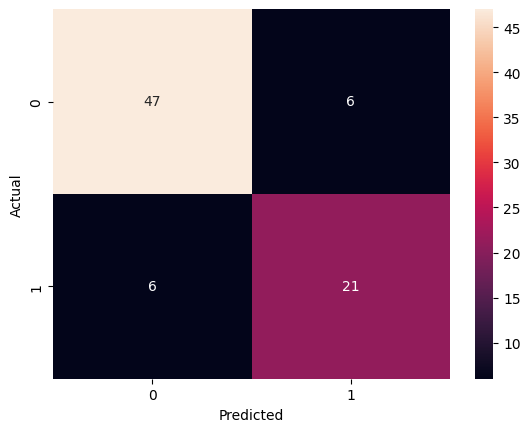

In [120]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [121]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.78      0.78      0.78        27

    accuracy                           0.85        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.85      0.85      0.85        80



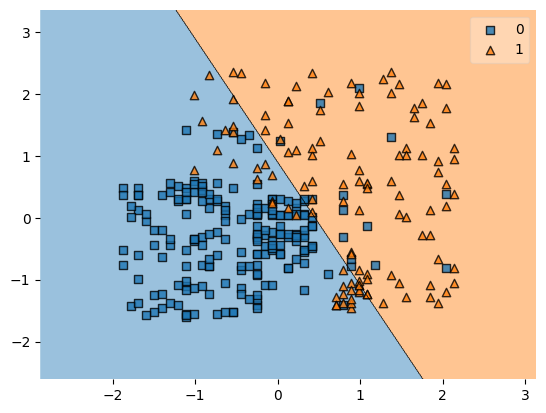

In [122]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=lgr_model)
plt.show()

# Support Vector Machine

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [124]:
svm_dataset = pd.read_csv("./Datasets/exp_4.csv")

In [125]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [126]:
X = svm_dataset.iloc[:,:-1].values
y = svm_dataset.iloc[:,-1].values

In [127]:
scaler = StandardScaler()

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

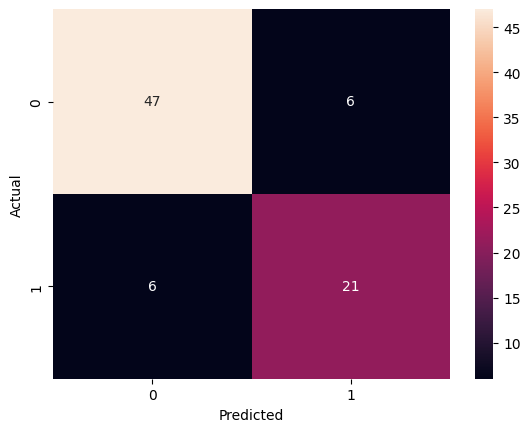

In [130]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.78      0.78      0.78        27

    accuracy                           0.85        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.85      0.85      0.85        80



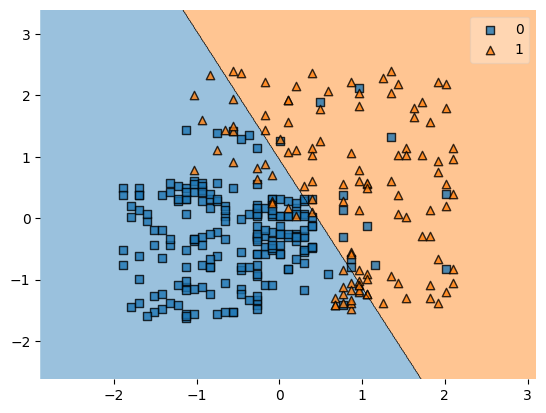

In [132]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=svm_model)
plt.show()